In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [2]:
def get_full_df(file_names, years, data_path, column_names):
    dfs = []
    i = 0
    for file in file_names:
        df = pd.read_csv(data_path + file, index_col= None, usecols= column_names, low_memory= False)
        df['year'] = years[i]
        i += 1
        dfs.append(df)

    tot_df = pd.concat(dfs, axis=0, ignore_index=True)
    return tot_df

def select_colleges(df, college_list):
    dfs = []
    for college in college_list:
        dfs.append(df.loc[df['INSTNM'] == college])
    tot_df = pd.concat(dfs, axis=0, ignore_index=True)
    return tot_df

data_path = '/mnt/d/Downloads/CollegeScorecard_Raw_Data_01192021/Raw Data Files/'

merged_file_names = ['MERGED1996_97_PP.csv', 'MERGED1997_98_PP.csv', 'MERGED1998_99_PP.csv', 'MERGED1999_00_PP.csv', 'MERGED2000_01_PP.csv', 
                     'MERGED2001_02_PP.csv', 'MERGED2002_03_PP.csv', 'MERGED2003_04_PP.csv', 'MERGED2004_05_PP.csv', 'MERGED2005_06_PP.csv', 
                     'MERGED2006_07_PP.csv', 'MERGED2007_08_PP.csv', 'MERGED2008_09_PP.csv', 'MERGED2009_10_PP.csv', 'MERGED2010_11_PP.csv', 
                     'MERGED2011_12_PP.csv', 'MERGED2012_13_PP.csv', 'MERGED2013_14_PP.csv', 'MERGED2014_15_PP.csv', 'MERGED2015_16_PP.csv', 
                     'MERGED2016_17_PP.csv', 'MERGED2017_18_PP.csv', 'Most-Recent-Cohorts-All-Data-Elements.csv']
merged_years = list(range(1996, 2019))
merged_cols = pd.read_csv(data_path + 'MERGED1996_97_PP.csv', index_col=0, nrows=0).columns.tolist()

field_file_names = ['FieldOfStudyData1415_1516_PP.csv', 'FieldOfStudyData1516_1617_PP.csv', 'Most-Recent-Cohorts-Field-of-Study.csv']
field_years = list(range(2016, 2019))
field_cols = pd.read_csv(data_path + 'FieldOfStudyData1415_1516_PP.csv', index_col=0, nrows=0).columns.tolist()

base_cols = ['UNITID', 'OPEID6', 'INSTNM']

colleges = ["University of Colorado Boulder", "University of San Diego", "University of California-Los Angeles", "New York University", "The University of Texas at Austin"]

In [3]:
plus_cols = ['DEBT_ALL_PP_EVAL_N', 'DEBT_ALL_PP_EVAL_MEAN', 'IPEDSCOUNT1', 'IPEDSCOUNT2', 'CIPDESC', 'CREDDESC']
plus_df = get_full_df(field_file_names, field_years, data_path, base_cols + plus_cols)

In [4]:
plus_college_df = select_colleges(plus_df, colleges)

In [5]:
plus_college_df.head()

,UNITID,OPEID6,INSTNM,CIPDESC,CREDDESC,IPEDSCOUNT1,IPEDSCOUNT2,DEBT_ALL_PP_EVAL_N,DEBT_ALL_PP_EVAL_MEAN,year
0,126614.0,1370,University of Colorado Boulder,Natural Resources Conservation and Research.,Undergraduate Certificate or Diploma,NaN,NaN,PrivacySuppressed,PrivacySuppressed,2016
1,126614.0,1370,University of Colorado Boulder,Natural Resources Conservation and Research.,Bachelors Degree,187.0,179.0,35,59623,2016
2,126614.0,1370,University of Colorado Boulder,Natural Resources Conservation and Research.,Master's Degree,10.0,5.0,PrivacySuppressed,PrivacySuppressed,2016
3,126614.0,1370,University of Colorado Boulder,Natural Resources Conservation and Research.,Doctoral Degree,4.0,6.0,PrivacySuppressed,PrivacySuppressed,2016
4,126614.0,1370,University of Colorado Boulder,Environmental Design.,Bachelors Degree,123.0,104.0,33,54740,2016


In [6]:
plus_college_field_df = plus_college_df.loc[plus_college_df['CIPDESC'].str.contains('Engineering')].loc[plus_college_df['CREDDESC'] == 'Bachelors Degree']
plus_college_field_df.head()

,UNITID,OPEID6,INSTNM,CIPDESC,CREDDESC,IPEDSCOUNT1,IPEDSCOUNT2,DEBT_ALL_PP_EVAL_N,DEBT_ALL_PP_EVAL_MEAN,year
43,126614.0,1370,University of Colorado Boulder,"Engineering, General.",Bachelors Degree,0.0,3.0,PrivacySuppressed,PrivacySuppressed,2016
45,126614.0,1370,University of Colorado Boulder,"Aerospace, Aeronautical and Astronautical Engi...",Bachelors Degree,90.0,69.0,20,PrivacySuppressed,2016
48,126614.0,1370,University of Colorado Boulder,Architectural Engineering.,Bachelors Degree,40.0,29.0,PrivacySuppressed,PrivacySuppressed,2016
52,126614.0,1370,University of Colorado Boulder,Chemical Engineering.,Bachelors Degree,45.0,81.0,22,48169,2016
55,126614.0,1370,University of Colorado Boulder,Civil Engineering.,Bachelors Degree,58.0,70.0,18,PrivacySuppressed,2016


In [7]:
awards = []
debt_n = []
debt_m = []
for college in colleges:
    college_df = plus_college_field_df.loc[plus_college_field_df['INSTNM'] == college]
    for index, row in college_df.iterrows():
        a = row['IPEDSCOUNT1'] + row['IPEDSCOUNT2']
        if math.isnan(a):
            a = 0
        if a and row['DEBT_ALL_PP_EVAL_N'] == 'PrivacySuppressed':
            dn = None
        elif (not a) and row['DEBT_ALL_PP_EVAL_N']  == 'PrivacySuppressed':
            dn = 0
        else:
            dn = int(row['DEBT_ALL_PP_EVAL_N'])
            
        if a and row['DEBT_ALL_PP_EVAL_MEAN'] == 'PrivacySuppressed':
            dm = None
        elif (not a) and row['DEBT_ALL_PP_EVAL_MEAN']  == 'PrivacySuppressed':
            dm = 0
        else:
            dm = int(row['DEBT_ALL_PP_EVAL_MEAN'])
            
        awards.append(a)
        debt_n.append(dn)
        debt_m.append(dm)
        
plus_college_field_df['awards'] = awards
plus_college_field_df['debt_n'] = debt_n
plus_college_field_df['debt_m'] = debt_m

debt_n = []
debt_m = []
for college in colleges:
    college_df = plus_college_field_df.loc[plus_college_field_df['INSTNM'] == college]
    adn_ratio = college_df.loc[college_df['debt_n'] >= 0]['debt_n'].sum() / college_df.loc[college_df['debt_n'] >= 0]['awards'].sum()
    adm = college_df.loc[college_df['debt_m'] >= 0]['debt_m'].mean()
    print(college, adn_ratio, adm)
    for index, row in college_df.iterrows():
        if math.isnan(row['debt_n']):
            debt_n.append(round(adn_ratio * row['awards']))
        else:
            debt_n.append(row['debt_n'])
            
        if math.isnan(row['debt_m']):
            debt_m.append(round(adm))
        else:
            debt_m.append(row['debt_m'])
    
plus_college_field_df['debt_n'] = debt_n
plus_college_field_df['debt_m'] = debt_m
plus_college_field_df.head(20)

University of Colorado Boulder 0.115545542323785 50094.11111111111
University of San Diego 0.22453703703703703 45293.5
University of California-Los Angeles 0.07475560667050028 39788.0
New York University 0.20848938826466917 30637.285714285714
The University of Texas at Austin 0.13711383834109184 20653.894736842107


,UNITID,OPEID6,INSTNM,CIPDESC,CREDDESC,IPEDSCOUNT1,IPEDSCOUNT2,DEBT_ALL_PP_EVAL_N,DEBT_ALL_PP_EVAL_MEAN,year,awards,debt_n,debt_m
43,126614.0,1370,University of Colorado Boulder,"Engineering, General.",Bachelors Degree,0.0,3.0,PrivacySuppressed,PrivacySuppressed,2016,3.0,0.0,50094.0
45,126614.0,1370,University of Colorado Boulder,"Aerospace, Aeronautical and Astronautical Engi...",Bachelors Degree,90.0,69.0,20,PrivacySuppressed,2016,159.0,20.0,50094.0
48,126614.0,1370,University of Colorado Boulder,Architectural Engineering.,Bachelors Degree,40.0,29.0,PrivacySuppressed,PrivacySuppressed,2016,69.0,8.0,50094.0
52,126614.0,1370,University of Colorado Boulder,Chemical Engineering.,Bachelors Degree,45.0,81.0,22,48169,2016,126.0,22.0,48169.0
55,126614.0,1370,University of Colorado Boulder,Civil Engineering.,Bachelors Degree,58.0,70.0,18,PrivacySuppressed,2016,128.0,18.0,50094.0
59,126614.0,1370,University of Colorado Boulder,Computer Engineering.,Bachelors Degree,38.0,42.0,PrivacySuppressed,PrivacySuppressed,2016,80.0,9.0,50094.0
60,126614.0,1370,University of Colorado Boulder,"Electrical, Electronics and Communications Eng...",Bachelors Degree,48.0,20.0,PrivacySuppressed,PrivacySuppressed,2016,68.0,8.0,50094.0
65,126614.0,1370,University of Colorado Boulder,Engineering Physics.,Bachelors Degree,21.0,36.0,PrivacySuppressed,PrivacySuppressed,2016,57.0,7.0,50094.0
66,126614.0,1370,University of Colorado Boulder,Environmental/Environmental Health Engineering.,Bachelors Degree,40.0,42.0,PrivacySuppressed,PrivacySuppressed,2016,82.0,9.0,50094.0
71,126614.0,1370,University of Colorado Boulder,Mechanical Engineering.,Bachelors Degree,196.0,203.0,48,54855,2016,399.0,48.0,54855.0


In [8]:
year_college_groups = plus_college_field_df.groupby(['INSTNM', 'year'])

univs = []
years = []
plus_perc = []
plus_mean = []

for name, group in year_college_groups:
    univs.append(name[0])
    years.append(name[1])
    plus_perc.append(group['debt_n'].sum() / group['awards'].sum())
    plus_mean.append(group['debt_m'].mean())
plus_perc_df = pd.DataFrame({'INSTNM': univs, 'year': years, 'plus_percent': plus_perc, 'plus_mean': plus_mean})
plus_perc_df.head()

,INSTNM,year,plus_percent,plus_mean
0,New York University,2016,0.211215,24810.25
1,New York University,2017,0.205782,30065.25
2,New York University,2018,0.210526,37035.75
3,The University of Texas at Austin,2016,0.147909,22587.10
4,The University of Texas at Austin,2017,0.137642,19641.00


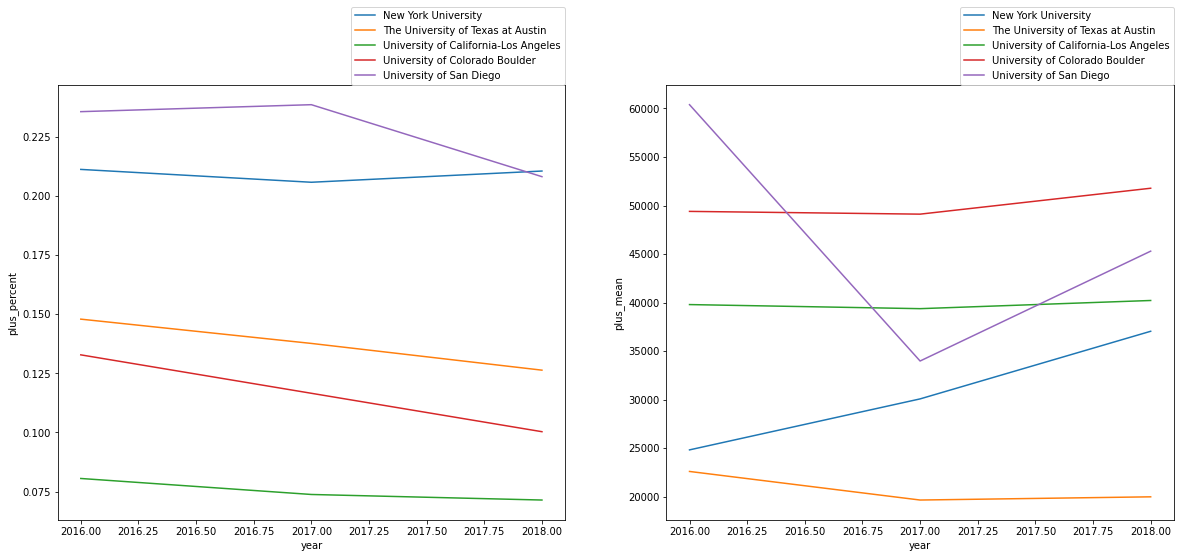

In [10]:
fig, ax =plt.subplots(figsize=(20, 8), ncols=2)

sns.lineplot(x='year', y='plus_percent', hue='INSTNM', 
             data=plus_perc_df, ax = ax[0])
sns.lineplot(x='year', y='plus_mean', hue='INSTNM', 
             data=plus_perc_df, ax = ax[1])
ax[0].legend(bbox_to_anchor=(1.0, 1), loc=4, borderaxespad=0.)
ax[1].legend(bbox_to_anchor=(1.0, 1), loc=4, borderaxespad=0.)